In [8]:
from langchain.llms import OpenAI

In [43]:
import os
os.environ["OPEN_API_KEY"]="sk-9bhYf"

In [45]:
llm=OpenAI(openai_api_key=os.environ["OPEN_API_KEY"],temperature=0.6)


In [46]:
text="What is the capital of India"

print(llm.predict(text))

RateLimitError: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}

In [12]:
os.environ["HUGGINGFACEHUB_API_TOKEN"]="hf_xSnzMX"

In [28]:
from langchain import HuggingFaceHub
llm_huggingface = HuggingFaceHub(repo_id="google/flan-t5-large", model_kwargs={"temperature":0, "max_length":64})

In [17]:
output=llm_huggingface.predict("Can you tell me captial of russia?")
print(output)

Moscow


In [51]:
import google.generativeai as genai

genai.configure(api_key="AIza")

model = genai.GenerativeModel('gemini-pro')

In [52]:
%%time
response = model.generate_content("Can you tell me captial of India?")

CPU times: user 51.2 ms, sys: 4.8 ms, total: 56 ms
Wall time: 3.16 s


In [54]:
print(response.text)

New Delhi


Prompt Templates And LLMChain

In [18]:
from langchain.prompts import PromptTemplate

prompt_template=PromptTemplate(input_variables=['country'],
template="Tell me the capital of this {country}")

prompt_template.format(country="India")

'Tell me the capital of this India'

In [29]:
from langchain.chains import LLMChain
chain=LLMChain(llm=llm_huggingface,prompt=prompt_template)
print(chain.run("India"))

chennai


Combining Multiple Chains Uing simple Sequential Chain

In [33]:
capital_template=PromptTemplate(input_variables=['country'],
template="Please tell me the capital of the {country}")

capital_chain=LLMChain(llm=llm_huggingface,prompt=capital_template)

famous_template=PromptTemplate(input_variables=['capital'],
template="Suggest me some amazing places to visit in {capital}")

famous_chain=LLMChain(llm=llm_huggingface,prompt=famous_template)

In [34]:
from langchain.chains import SimpleSequentialChain
chain=SimpleSequentialChain(chains=[capital_chain,famous_chain])
chain.run("India")

'The Temple of Lord Vishnu'

Sequential Chain

In [38]:
capital_template=PromptTemplate(input_variables=['country'],
template="Please tell me the capital of the {country}")

capital_chain=LLMChain(llm=llm_huggingface,prompt=capital_template,output_key="capital")

famous_template=PromptTemplate(input_variables=['capital'],
template="Suggest me some amazing places to visit in {capital}")

famous_chain=LLMChain(llm=llm_huggingface,prompt=famous_template,output_key="places")

In [39]:
from langchain.chains import SequentialChain
chain=SequentialChain(chains=[capital_chain,famous_chain],
input_variables=['country'],
output_variables=['capital',"places"])

In [40]:
chain({'country':"England"})

{'country': 'England', 'capital': 'london', 'places': 'London Eye'}

Chatmodels

In [58]:
from langchain_google_genai import ChatGoogleGenerativeAI

os.environ["GOOGLE_API_KEY"] = "AIza"
llm = ChatGoogleGenerativeAI(model="gemini-pro")
result = llm.invoke("Guess who's back")
print(result.content)

Back again


Streaming and Batching

In [59]:
for chunk in llm.stream("Write a rap about LLMs."):
    print(chunk.content)
    print("---")

**Verse 1:**
Yo, check it, I'm here to
---
 spit the truth,
About the latest tech, it's a brand-new ruth.
LLMs, they're here to stay,
Artificial
---
 intelligence, they're here to slay.

**Chorus:**
LLMs, LLMs, the future's bright,
They're changing the game, with all their might.
From writing text to generating code,
They're making our lives easier, it's a golden node.


---
**Verse 2:**
They're trained on data, massive and wide,
Algorithms complex, with knowledge they abide.
Natural language, they understand so well,
Converse with them, it's like a magic spell.

**Verse 3:**
In healthcare, education, and finance,
They're automating tasks, giving us a chance.
Customer service, chatbots on the rise,
Resolving issues, under sunny skies.

**Verse 4:**
But with great power, comes great responsibility,
We must use them wisely, with humility.
Bias and ethics, we must address
---
,
To ensure a future that's truly blessed.

**Bridge:**
Some fear they'll take our jobs, it's true,
But they're he

In [60]:
results = llm.batch(
    [
        "Why is sky blue",
        "Why is water wet",
        "Why does fire have heat",
    ]
)
for res in results:
    print(res.content)

The sky appears blue due to a phenomenon known as Rayleigh scattering. As sunlight passes through the Earth's atmosphere, it interacts with molecules of nitrogen and oxygen. These molecules are much smaller than the wavelength of visible light, and most of the light passes through them without being affected. However, a small amount of the light is scattered in all directions by these molecules. The amount of scattering depends on the wavelength of the light, with shorter wavelengths (blue light) being scattered more than longer wavelengths (red light). This is because the shorter wavelengths of light have a higher energy and are more likely to interact with the molecules in the atmosphere.

As a result of Rayleigh scattering, the blue light from the sun is scattered more than the other colors of light, and this scattered blue light reaches our eyes from all directions. This is what gives the sky its blue appearance.

At sunset and sunrise, the sunlight has to travel through a greater 

Multimodal 

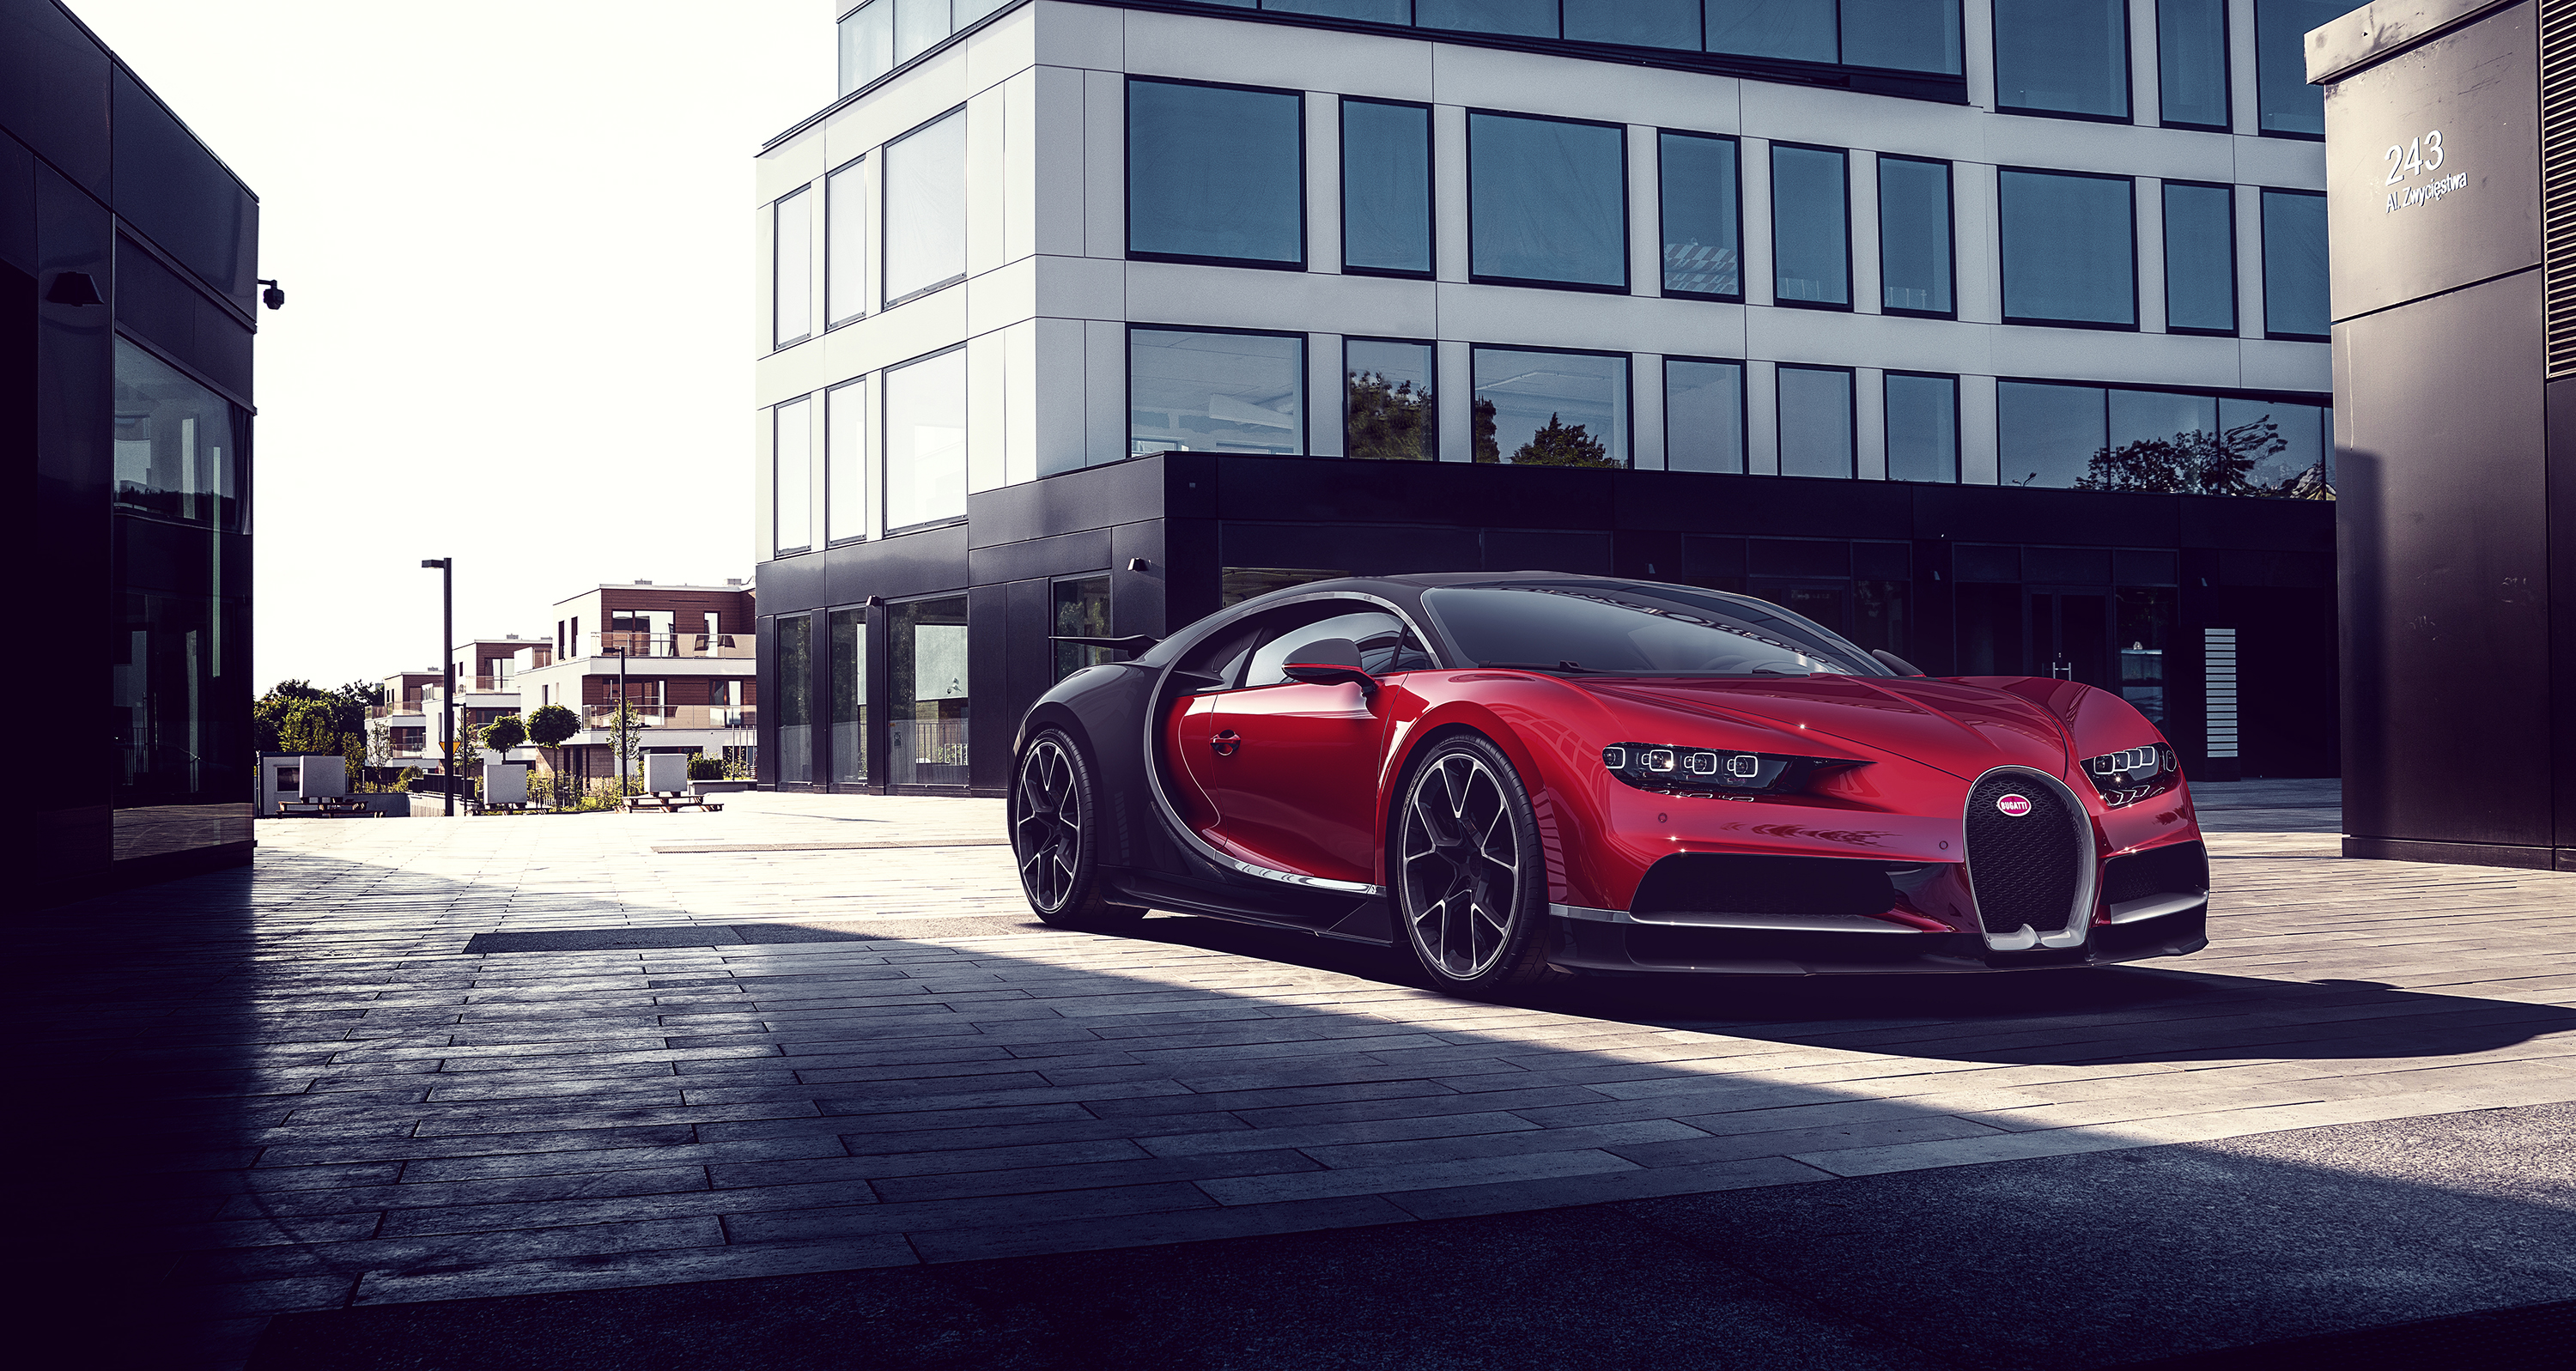

In [62]:
from IPython.display import Image

Image("red.jpg")

In [69]:
from langchain_core.messages import HumanMessage,SystemMessage,AIMessage
from langchain_google_genai import ChatGoogleGenerativeAI
os.environ["GOOGLE_API_KEY"] = "AIza"
chatllm = ChatGoogleGenerativeAI(model="gemini-pro", convert_system_message_to_human=True)

chatllm([
SystemMessage(content="Yor are a comedian AI assitant"),
HumanMessage(content="Please provide some corporate jokes")
])


AIMessage(content='**Office Humor**\n\n* Why did the employee get fired from the pencil factory?\n  Because he wasn\'t sharp enough.\n\n* What do you call a meeting where everyone is talking at once?\n  A conference discord.\n\n* Why did the boss give the employee a mirror?\n  So he could see who was really to blame.\n\n**Tech Jokes**\n\n* Why did the programmer get lost?\n  Because he didn\'t have a map function.\n\n* What do you call a programmer who can\'t fix their own code?\n  A bug-free coder.\n\n* Why did the computer science student get a cold?\n  Because they opened too many tabs.\n\n**Management Jokes**\n\n* What\'s the difference between a boss and a leader?\n  A boss points the finger, while a leader points the way.\n\n* Why did the manager put a clock on the wall?\n  So his employees could watch the time fly by.\n\n* What do you call a manager who can\'t make a decision?\n  A procrastinator with authority.\n\n**Corporate Culture Jokes**\n\n* Why did the new employee start 

In [73]:
image_url = "https://picsum.photos/seed/picsum/300/300"
content = requests.get(image_url).content
Image(content)

# example
message = HumanMessage(
    content=[
        {
            "type": "text",
            "text": "What's in this image?",
        },  # You can optionally provide text parts
        {"type": "image_url", "image_url": Image("red.jpg")},
    ]
)
chatllm.invoke([message])

ValueError: Unable to process the provided image source: 'Image' object has no attribute 'startswith'

Safety Settings

In [74]:
from langchain_google_genai import (
    ChatGoogleGenerativeAI,
    HarmBlockThreshold,
    HarmCategory,
)

chatllm = ChatGoogleGenerativeAI(
    model="gemini-pro",
    safety_settings={
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
    convert_system_message_to_human=True
)

chatllm([
SystemMessage(content="Yor are a comedian AI assitant"),
HumanMessage(content="Please provide some comedy punchlines on AI")
])

AIMessage(content="* Why did the AI cross the road? To get to the other algorithm.\n* What do you call an AI with a PhD? A doctorate of artificial intelligence.\n* Why did the AI join a choir? Because it wanted to sing in a virtual chorus.\n* What's the difference between an AI and a human? One is processing data, the other is procrastinating.\n* Why did the AI get a speeding ticket? Because it was driving in the fast lane of information.")

In [75]:
from langchain.prompts.chat import ChatPromptTemplate
from langchain.schema import BaseOutputParser

class Commaseperatedoutput(BaseOutputParser):
    def parse(self,text:str):
        return text.strip().split(",")
    
template="Your are a helpful assistant. When the use given any input , you should generate 5 words synonyms in a comma seperated list"
human_template="{text}"
chatprompt=ChatPromptTemplate.from_messages([
    ("system",template),
    ("human",human_template)
])

In [76]:
chain=chatprompt|chatllm|Commaseperatedoutput()

chain.invoke({"text":"gorgeous"})

['stunning', ' beautiful', ' breathtaking', ' radiant', ' dazzling']